In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob
from itertools import product
import os
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import numpy as np
import cv2
from math import ceil, floor
from skimage import data, color, feature

from lol_plot import IMAGE_PATHS, read_image_path, extract_edges, plot_match

In [3]:
from cv2 import TM_CCOEFF, TM_CCOEFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_SQDIFF, TM_SQDIFF_NORMED

In [4]:
al, at, ar, ab = [[], [], [], []]  # all left, all top, ...
for image_path in IMAGE_PATHS[:-1]:
    image, health_bars_save_path, df_health_bars = read_image_path(image_path)
    print(image.shape)
    assert df_health_bars is not None
    el, et, er, eb = extract_edges(image, df_health_bars)
    al.extend(el)
    at.extend(et)
    ar.extend(er)
    ab.extend(eb)
    

(1080, 1920, 3)
(1080, 1920, 4)
(1080, 1920, 4)
(1080, 1920, 4)


In [5]:
image, health_bars_save_path, df_health_bars = read_image_path(IMAGE_PATHS[3])

In [6]:
image.shape

(1080, 1920, 4)

In [7]:
# mask= np.ones(template.shape[:-1])
# mask

template (7, 136, 3)


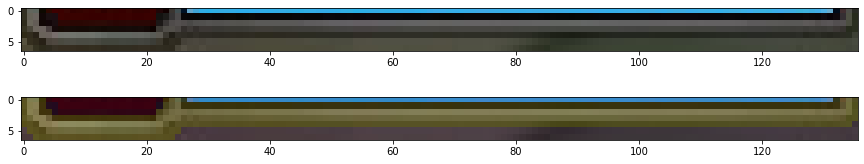

In [8]:
from trash.da_mask import da_mask
mask = da_mask

# al 0, 8, 10
template = ab[0][7:-1,1:-1,:]
print("template", template.shape)
# template = er[0]
fig, ax = plt.subplots(2,1, figsize=(15, 3))
ax[0].imshow(template)
ax[1].imshow(template)
ax[1].imshow(mask, alpha=0.2)

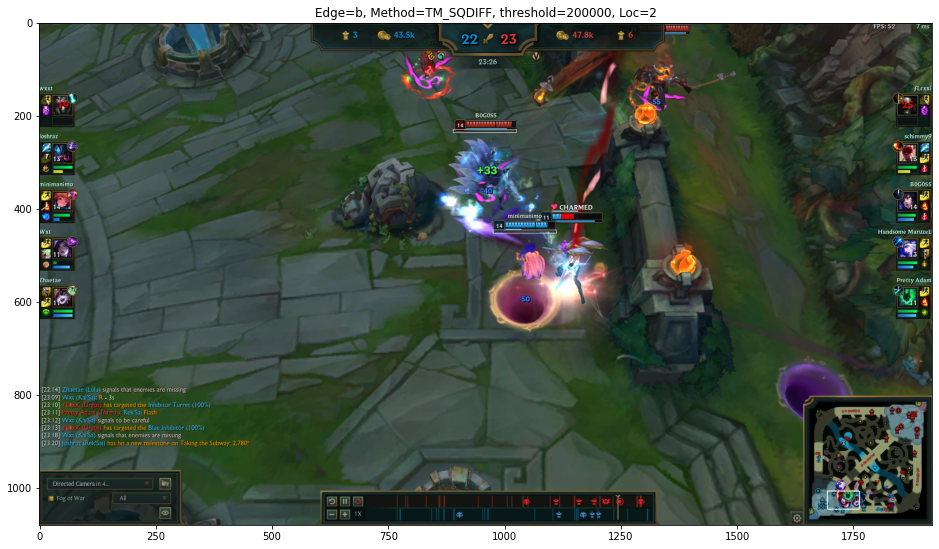

In [9]:
image_path = IMAGE_PATHS[3]
# method_name = "TM_CCOEFF_NORMED"
# method_name = "TM_CCORR_NORMED"
method_name = "TM_SQDIFF"
plot = True
save = True
plot_match(image_path, "b", method_name, plot=plot, save=save)

In [10]:
# save_template("b", template, mask)